In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from collections import defaultdict

from matplotlib.ticker import FormatStrFormatter

In [2]:
path = Path.cwd()/'logs/imagenet'
path

PosixPath('/Users/davoodwadi/code/logs/imagenet')

In [3]:
logfiles = [f for f in path.iterdir() if '.DS_Store' not in f.name]
logfiles

[PosixPath('/Users/davoodwadi/code/logs/imagenet/RAdam_1e-5.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Adabelief_0.001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Agg_0.001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Agg_0.01.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/AdamW_0.01.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Agg_0.0001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/AdamW_0.001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/RAdam_0.0001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/RAdam_0.001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Adabelief_1e-5.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Agg_1e-5.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/AdamW_1e-5.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Adabelief_0.0001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/AdamW_0.0001.txt')]

In [4]:
def get_meta(filepath):
    optim = filepath.stem.split('_')[0]
    lr = float(filepath.stem.split('_')[1])
    return optim, lr

In [5]:
class Log:
    def __init__(self, filePath):
        self.filePath = filePath
        self.open_file()
        self.process_raw()
        self.get_accs()
        
    def process_raw(self):
        self.log = self.log.split('\n')
        self.log = [l for l in self.log if 'acc' in l]
        self.log = [d.split(',')[:3] for d in self.log]
    
    def open_file(self):
        with open(self.filePath, 'r') as f:
            self.log = f.read()
            self.optim = self.filePath.stem.split('_')[0]
            self.lr = float(self.filePath.stem.split('_')[1])
    def get_accs(self):
        self.acc1 = []
        self.acc5 = []
        self.train_loss = []
        self.epoch = []
        for e, epoch in enumerate(self.log):
            acc = [a.split('=')[1] for a in epoch[:3]]
            self.acc1.append(float(acc[0].strip()))
            self.acc5.append(float(acc[1].strip()))
            self.train_loss.append(float(acc[2].strip()))
            self.epoch.append(int(e))
        

In [6]:
def min_epoch(logs):
    mini = float('inf')
    for optim, log in logs.items():
        for lr, lo in log.items():
            if len(lo.epoch)<mini: mini=len(lo.epoch)
    return mini

In [7]:
logfiles

[PosixPath('/Users/davoodwadi/code/logs/imagenet/RAdam_1e-5.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Adabelief_0.001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Agg_0.001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Agg_0.01.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/AdamW_0.01.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Agg_0.0001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/AdamW_0.001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/RAdam_0.0001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/RAdam_0.001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Adabelief_1e-5.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Agg_1e-5.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/AdamW_1e-5.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/Adabelief_0.0001.txt'),
 PosixPath('/Users/davoodwadi/code/logs/imagenet/AdamW_0.0001.txt')]

In [30]:
logs = defaultdict(dict)
for file in logfiles:
    optim, lr = get_meta(file)
    logs[optim][lr] = Log(file)

In [31]:
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]


In [32]:
mini = min_epoch(logs)
mini

111

## testing grouped plots

In [11]:
logs

defaultdict(dict,
            {'RAdam': {1e-05: <__main__.Log at 0x7fec9937b820>,
              0.0001: <__main__.Log at 0x7fec96dbddc0>,
              0.001: <__main__.Log at 0x7fec96dbdaf0>},
             'Adabelief': {0.001: <__main__.Log at 0x7fec96d8e310>,
              1e-05: <__main__.Log at 0x7fec96dbd490>,
              0.0001: <__main__.Log at 0x7fec96de58b0>},
             'Agg': {0.001: <__main__.Log at 0x7fec99364700>,
              0.01: <__main__.Log at 0x7fec993646d0>,
              0.0001: <__main__.Log at 0x7fec96dc1e20>,
              1e-05: <__main__.Log at 0x7fec96de5dc0>},
             'AdamW': {0.01: <__main__.Log at 0x7fec96dc1f70>,
              0.001: <__main__.Log at 0x7fec96dc1f10>,
              1e-05: <__main__.Log at 0x7fec96dc8670>,
              0.0001: <__main__.Log at 0x7fec96de5fa0>}})

In [12]:
import matplotlib.cm as cm

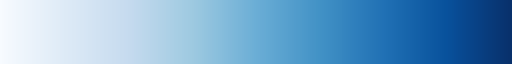

In [33]:
Blues = cm.get_cmap('Blues')
Blues

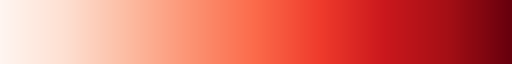

In [34]:
Reds = cm.get_cmap('Reds')
Reds

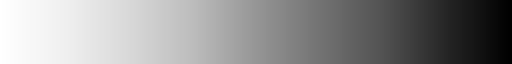

In [35]:
Greys = cm.get_cmap("Greys")
Greys

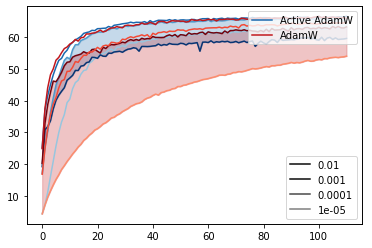

In [38]:
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,4))
colors = ['b', 'r', 'g', ]
styles = ['-', '--', '-.']
markers=['P','.']
optims=['Active AdamW', 'AdamW']
cs = {'Active AdamW': Blues, 'AdamW':Reds}
optim = 'Agg'
lrs=[0.01,0.001,0.0001,1e-05]
p0 = ax.plot(logs[optim][lrs[3]].acc1[:mini], color=Blues(100),)
p1 = ax.plot(logs[optim][lrs[0]].acc1[:mini], color=Blues(250),)
p2 = ax.plot(logs[optim][lrs[1]].acc1[:mini], color=Blues(200), )
p3 = ax.plot(logs[optim][lrs[2]].acc1[:mini], color=Blues(150), )

ax.fill_between(range(mini), logs[optim][lrs[0]].acc1[:mini], logs[optim][lrs[2]].acc1[:mini], alpha=.25, color=Blues(200))

optim = 'AdamW'
lrs=[0.01,0.001,0.0001,1e-05]
p4 = ax.plot(logs[optim][lrs[0]].acc1[:mini], color=Reds(250))
p5 = ax.plot(logs[optim][lrs[1]].acc1[:mini], color=Reds(200))
p6 = ax.plot(logs[optim][lrs[2]].acc1[:mini], color=Reds(150))
p10 = ax.plot(logs[optim][lrs[3]].acc1[:mini], color=Reds(100))
p7, = ax.plot(np.NaN, np.NaN, label=lrs[0], c=Greys(250))
p8, = ax.plot(np.NaN, np.NaN, label=lrs[0], c=Greys(250))
p9, = ax.plot(np.NaN, np.NaN, label=lrs[0], c=Greys(200))
p10, = ax.plot(np.NaN, np.NaN, label=lrs[0], c=Greys(150))

ax.fill_between(range(mini), logs[optim][lrs[0]].acc1[:mini], logs[optim][lrs[3]].acc1[:mini], alpha=.25, color=Reds(200))
#         ax.set_title(optim)
#     if i==0:
#         handles, labels = ax.get_legend_handles_labels()
#         fig.legend(handles, labels, loc=(.765,0.1))
ax.legend([p7,p8,p9,p10], lrs)
#         ax.set_ylabel('Top 1 Accuracy')
ax2 = ax.twinx()
for ss, optim in enumerate(optims):
#     ax2.plot(np.NaN, np.NaN, #ls=styles[ss],
#              label=f'{optim}', c='black', marker=markers[ss])
    ax2.plot(np.NaN, np.NaN, c=cs[optim](200), label=optim)
ax2.get_yaxis().set_visible(False)
ax2.legend()

## average and std of accuracy for each optimizer

In [94]:
for optim in logs.keys():
#     lr0 = logs[optim][0.01].acc1[:mini]
    lr1 = logs[optim][0.001].acc1[:mini]
    lr2 = logs[optim][0.0001].acc1[:mini]
    lr3 = logs[optim][1e-5].acc1[:mini]
    lrs = np.stack([lr1,lr2,lr3])
    logs[optim]['mean'] = lrs.mean(0)
    logs[optim]['std'] = lrs.std(0)
    
#     print(lrs.shape)
#     print(logs[optim])

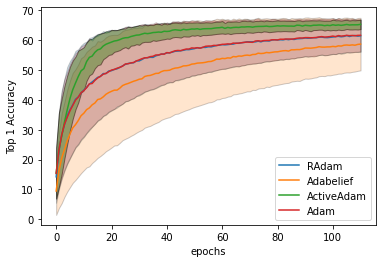

In [24]:
fig, ax = plt.subplots(1,1, sharey=True)
hatches = {
    'Agg': '*',
    'Adabelief': '.',
    'AdamW': '|',
    'RAdam': 'X'
}
for i, optim in enumerate(logs.keys()):
    mean = logs[optim]['mean']
    std = logs[optim]['std']
    label = optim
    if optim=='AdamW': label='Adam'
    if optim=='Agg': label='ActiveAdam'
    l, = ax.plot(mean, label=label)
    color = l.get_color()
    if optim=='Agg':
        alpha=.5
    else:
        alpha=.2
#     ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor=color, facecolor='none', hatch=hatches[optim])
    ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor='black', facecolor=color)
ax.set_xlabel('epochs')
ax.set_ylabel('Top 1 Accuracy')
ax.legend()

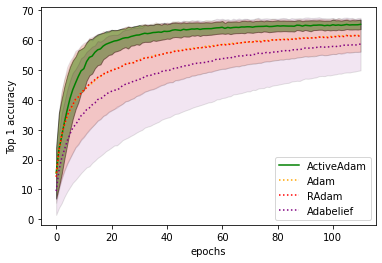

In [95]:
fig, ax = plt.subplots(1,1, sharey=True)
hatches = {
    'Agg': '*',
    'Adabelief': '.',
    'AdamW': '|',
    'RAdam': 'X'
}
colors = ['green', 'orange', 'red', 'purple']
optims = ['Agg', 'AdamW', 'RAdam', 'Adabelief']
for i, (optim, color) in enumerate(zip(optims, colors)):
    mean = logs[optim]['mean']
    std = logs[optim]['std']
    label = optim
    linestyle='dotted'
    if optim=='AdamW': label='Adam'
    if optim=='Agg': 
        label='ActiveAdam'
        linestyle='-'
    l, = ax.plot(mean, color=color, label=label, linestyle=linestyle)
    color = l.get_color()
    if optim=='Agg':
        alpha=.5
    else:
        alpha=.1
#     ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor=color, facecolor='none', hatch=hatches[optim])
    ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor='black', facecolor=color)
ax.set_xlabel('epochs')
ax.set_ylabel('Top 1 accuracy')
ax.legend()

In [96]:
fig.savefig('./plots/imagenet_top1.png', dpi=300, bbox_inches='tight')

Top 5

In [65]:
logs.keys()

dict_keys(['RAdam', 'Adabelief', 'Agg', 'AdamW', 'ActiveAdam'])

In [84]:
logs = defaultdict(dict)
for file in logfiles:
    optim, lr = get_meta(file)
    logs[optim][lr] = Log(file)

In [91]:
for optim in logs.keys():
    lr1 = logs[optim][0.001].acc5[:mini]
    lr2 = logs[optim][0.0001].acc5[:mini]
    lr3 = logs[optim][1e-5].acc5[:mini]
    lrs = np.stack([lr1,lr2,lr3])
    logs[optim]['mean'] = lrs.mean(0)
    logs[optim]['std'] = lrs.std(0)
    
#     print(lrs.shape)
#     print(logs[optim])

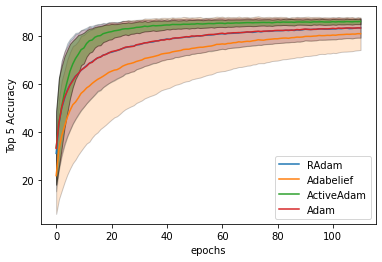

In [68]:
fig, ax = plt.subplots(1,1, sharey=True)
hatches = {
    'Agg': '*',
    'Adabelief': '.',
    'AdamW': '|',
    'RAdam': 'X'
}
for i, optim in enumerate(logs.keys()):
    mean = logs[optim]['mean']
    std = logs[optim]['std']
    label = optim
    if optim=='AdamW': label='Adam'
    if optim=='Agg': label='ActiveAdam'
    l, = ax.plot(mean, label=label)
    color = l.get_color()
    if optim=='Agg':
        alpha=.5
    else:
        alpha=.2
#     ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor=color, facecolor='none', hatch=hatches[optim])
    ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor='black', facecolor=color)
ax.set_xlabel('epochs')
ax.set_ylabel('Top 5 Accuracy')
ax.legend()

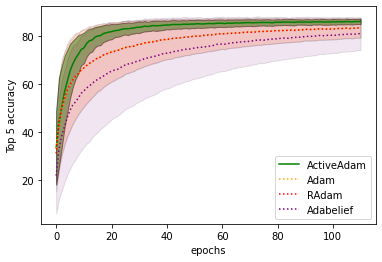

In [92]:
fig, ax = plt.subplots(1,1, sharey=True)
hatches = {
    'Agg': '*',
    'Adabelief': '.',
    'AdamW': '|',
    'RAdam': 'X'
}
colors = ['green', 'orange', 'red', 'purple']
optims = ['Agg', 'AdamW', 'RAdam', 'Adabelief']
for i, (optim, color) in enumerate(zip(optims, colors)):
    mean = logs[optim]['mean']
    std = logs[optim]['std']
    label = optim
    linestyle='dotted'
    if optim=='AdamW': label='Adam'
    if optim=='Agg': 
        label='ActiveAdam'
        linestyle='-'
    l, = ax.plot(mean, color=color, label=label, linestyle=linestyle)
    color = l.get_color()
    if optim=='Agg':
        alpha=.5
    else:
        alpha=.1
#     ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor=color, facecolor='none', hatch=hatches[optim])
    ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor='black', facecolor=color)
ax.set_xlabel('epochs')
ax.set_ylabel('Top 5 accuracy')
ax.legend()

In [93]:
fig.savefig('./plots/imagenet_top5.png', dpi=300, bbox_inches='tight')

Loss

In [88]:
for optim in logs.keys():
    lr1 = logs[optim][0.001].train_loss[:mini]
    lr2 = logs[optim][0.0001].train_loss[:mini]
    lr3 = logs[optim][1e-5].train_loss[:mini]
    lrs = np.stack([lr1,lr2,lr3])
    logs[optim]['mean'] = lrs.mean(0)
    logs[optim]['std'] = lrs.std(0)
    logs[optim]['min'] = lrs.min(0)
    logs[optim]['max'] = lrs.max(0)
    
#     print(lrs.shape)
#     print(logs[optim])

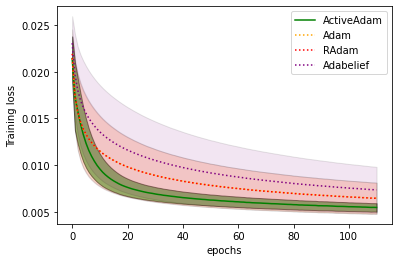

In [89]:
fig, ax = plt.subplots(1,1, sharey=True)
hatches = {
    'Agg': '*',
    'Adabelief': '.',
    'AdamW': '|',
    'RAdam': 'X'
}
colors = ['green', 'orange', 'red', 'purple']
optims = ['Agg', 'AdamW', 'RAdam', 'Adabelief']
for i, (optim, color) in enumerate(zip(optims, colors)):
    mean = logs[optim]['mean']
    std = logs[optim]['std']
    label = optim
    linestyle='dotted'
    if optim=='AdamW': label='Adam'
    if optim=='Agg': 
        label='ActiveAdam'
        linestyle='-'
    l, = ax.plot(mean, color=color, label=label, linestyle=linestyle)
    color = l.get_color()
    if optim=='Agg':
        alpha=.5
    else:
        alpha=.1
#     ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor=color, facecolor='none', hatch=hatches[optim])
    ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor='black', facecolor=color)
ax.set_xlabel('epochs')
ax.set_ylabel('Training loss')
ax.legend()

In [90]:
fig.savefig('./plots/imagenet_loss.png', dpi=300, bbox_inches='tight')

## plots

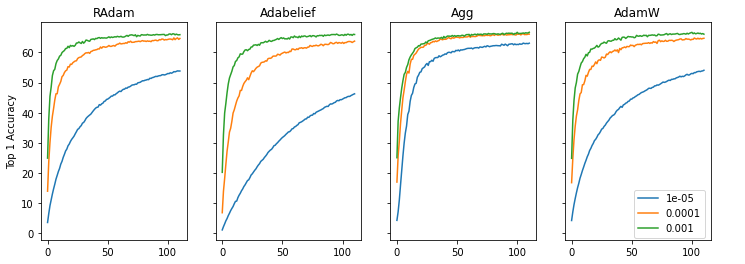

In [26]:
fig, axes = plt.subplots(1,4, sharey=True, figsize=(12,4))
for i, (ax, optim) in enumerate(zip(axes, logs.keys())):
    for lr in sorted(logs[optim].keys()):
        if lr==0.01: continue
        ax.plot(logs[optim][lr].acc1[:mini], label=lr)
        ax.set_title(optim)
    if i==0:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc=(.85,0.1))
        ax.set_ylabel('Top 1 Accuracy')

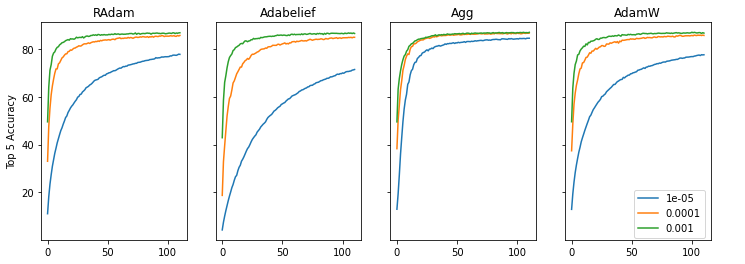

In [25]:
fig, axes = plt.subplots(1,4, sharey=True, figsize=(12,4))
for i, (ax, optim) in enumerate(zip(axes, logs.keys())):
    for lr in sorted(logs[optim].keys()):
        if lr==0.01: continue
        ax.plot(logs[optim][lr].acc5[:mini], label=lr)
        ax.set_title(optim)
    if i==0:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc=(.85,0.1))
        ax.set_ylabel('Top 5 Accuracy')

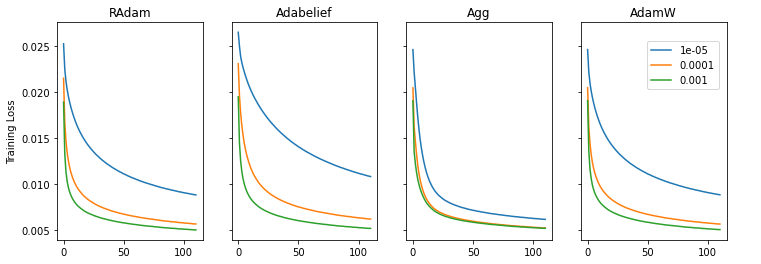

In [27]:
fig, axes = plt.subplots(1,4, sharey=True, figsize=(12,4))
for i, (ax, optim) in enumerate(zip(axes, logs.keys())):
    for lr in sorted(logs[optim].keys()):
        if lr==0.01: continue
        ax.plot(logs[optim][lr].train_loss[:mini], label=lr)
        ax.set_title(optim)
    if i==0:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc=(.85,0.66))
        ax.set_ylabel('Training Loss')

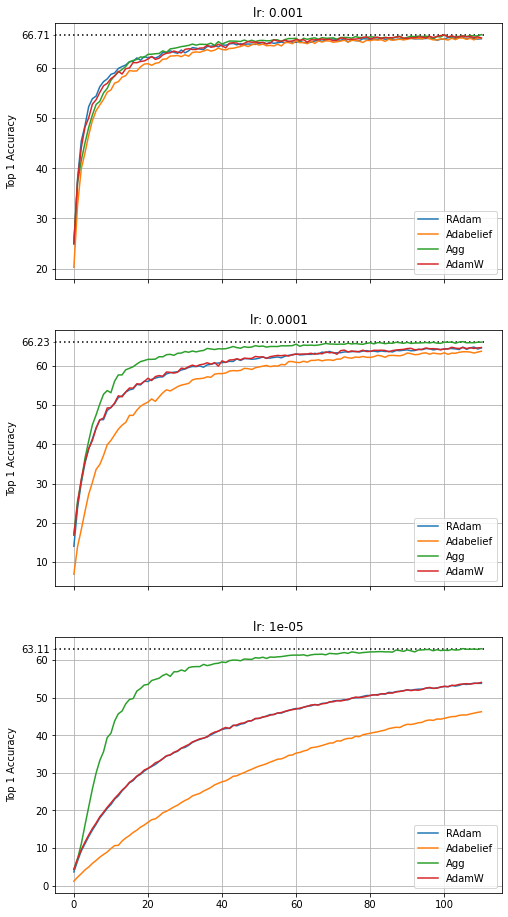

In [28]:
fig, axes = plt.subplots(3,1, sharex=True, figsize=(8,16))
for i, (lr, ax) in enumerate(zip(sorted(logs['AdamW'].keys(), reverse=True)[1:], axes)):
    max_y = 0
    for optim in logs.keys():
        ax.plot(logs[optim][lr].acc1[:mini], label=optim)
        
        # plotting max horizontal line
        max_y = max(max(logs[optim][lr].acc1[:mini]), max_y)
        
        ax.legend(loc='lower right')
        ax.set_title(f'lr: {lr}')
        ax.grid(b=True)
        ax.set_xlim(left=-5.)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_ylabel('Top 1 Accuracy')
# plt.tight_layout()

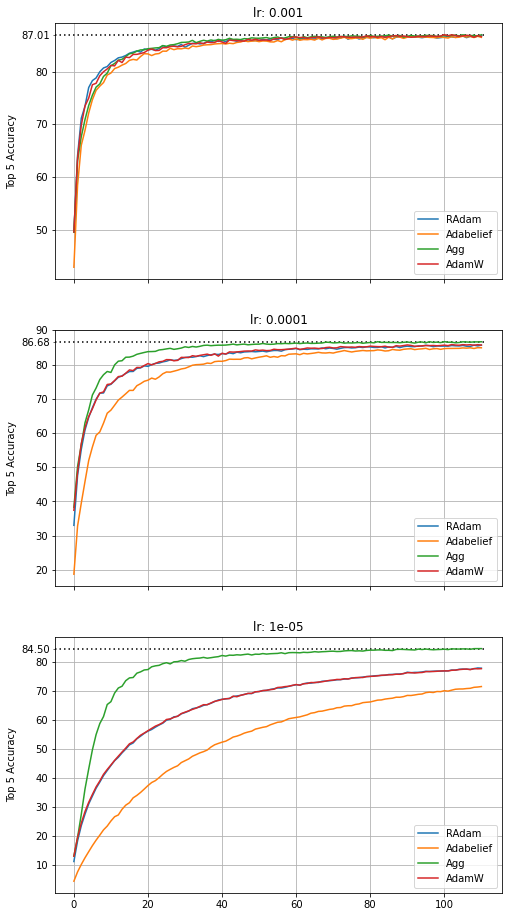

In [29]:
fig, axes = plt.subplots(3,1, sharex=True, figsize=(8,16))
for i, (lr, ax) in enumerate(zip(sorted(logs['AdamW'].keys(), reverse=True)[1:], axes)):
    max_y = 0
    for optim in logs.keys():
        ax.plot(logs[optim][lr].acc5[:mini], label=optim)
        
        # plotting max horizontal line
        max_y = max(max(logs[optim][lr].acc5[:mini]), max_y)
        
        ax.legend(loc='lower right')
        ax.set_title(f'lr: {lr}')
        ax.grid(b=True)
        ax.set_xlim(left=-5.)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_ylabel('Top 5 Accuracy')
# plt.tight_layout()

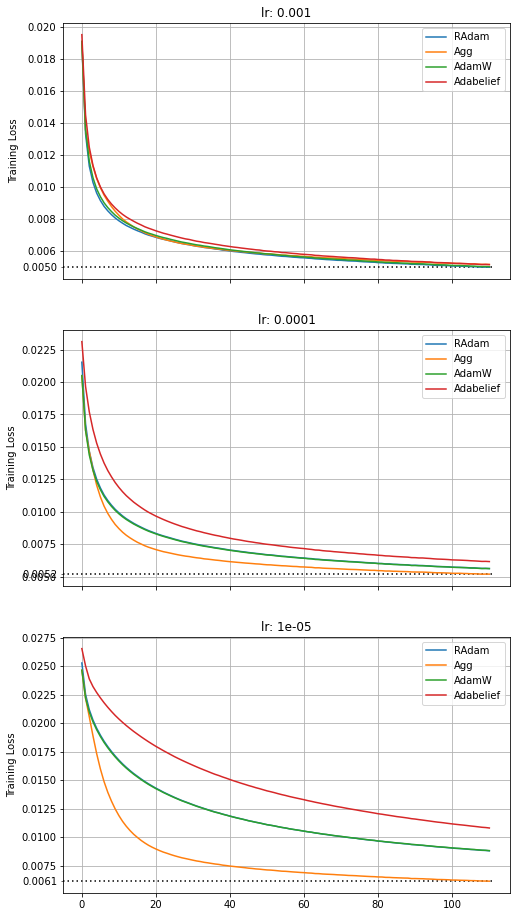

In [30]:
fig, axes = plt.subplots(3,1, sharex=True, figsize=(8,16))
for i, (lr, ax) in enumerate(zip(sorted(logs['AdamW'].keys(), reverse=True)[1:], axes)):
    max_y = float('inf')
    for optim in sorted(logs.keys(), reverse=True):
        ax.plot(logs[optim][lr].train_loss[:mini], label=optim)
        
        # plotting max horizontal line
        max_y = min(min(logs[optim][lr].train_loss[:mini]), max_y)
        
        ax.legend(loc='upper right')
        ax.set_title(f'lr: {lr}')
        ax.grid(b=True)
        ax.set_xlim(left=-5.)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.4f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_ylabel('Training Loss')
# plt.tight_layout()

In [36]:
list(zip(logs['RAdam'][0.0001].train_loss, logs['AdamW'][0.0001].train_loss, logs['Adabelief'][0.0001].train_loss))

[(0.021530205383896828, 0.020501941442489624, 0.02311607450246811),
 (0.01677325740456581, 0.016273880377411842, 0.019662216305732727),
 (0.014681334607303143, 0.014384233392775059, 0.017712412402033806),
 (0.013411135412752628, 0.01319710910320282, 0.016348546370863914),
 (0.012511095032095909, 0.01233967300504446, 0.015288508497178555),
 (0.011838128790259361, 0.011704323813319206, 0.014450193382799625),
 (0.011295048519968987, 0.011181131936609745, 0.013753686100244522),
 (0.010868927463889122, 0.01076596975326538, 0.01317605935037136),
 (0.01050625927746296, 0.010411819443106651, 0.012691284529864788),
 (0.010187214240431786, 0.010102984495460987, 0.012253097258508205),
 (0.00991998054087162, 0.00984075665473938, 0.011875037103891373),
 (0.009675402194261551, 0.00960603728890419, 0.011539541184902191),
 (0.009463975206017494, 0.009402451105415821, 0.011240732856094837),
 (0.00928279384970665, 0.009222583845257759, 0.010984605178236961),
 (0.009108571335673332, 0.009051894769072533,

In [35]:
logs['Adabelief']

{0.001: <__main__.Log at 0x7fe96ce77390>,
 1e-05: <__main__.Log at 0x7fe96dd1e2d0>,
 0.0001: <__main__.Log at 0x7fe96f340390>}